# Oraciones y clasificadores

El Text Mining, también llamado Minería de Textos, es el conjunto de técnicas y tecnologías que se utilizan para explorar grandes cantidades de texto, de manera automática o semiautomática, y descubre patrones repetitivos, tendencias o reglas que explican el comportamiento del texto.

### Vectorización

- **CountVectorizer** >> Se utiliza para convertir una colección de documentos de texto en un vector de recuentos de términos / tokens. También permite el preprocesamiento de datos de texto antes de generar la representación vectorial. Esta funcionalidad lo convierte en un módulo de representación de características altamente flexible para texto.

- **TfidfVectorizer** >> Convierta una colección de documentos sin procesar en una matriz de funciones TF-IDF.

### Medidas de evaluación

- Precision >> Indica que tan bueno es el modelo para predecir positivos de acuerdo a verdaderos positivos y falsos positivos.

- Recall >> Indica que tan bueno es el modelo para determinar cuantos positivos del total es capaz de determinar.

- F-score >> Indica que tan efectivo fue el modelo para predecir las clases de los casos.


## Preparación de datos

Para poder correr los algoritmos de clasificación automatica de textos, primero deberemos preparar los datos de entrenamiento y de evalución.

In [196]:
# Abrir archivos de datos
DataX = open("./trainData.txt","r")
DataY = open("./trainClasses.txt","r")
DatatestX = open("./testData.txt","r")
DatatestY = open("./testClasses.txt","r")

def splitFile(File,List):
    for line in File:
        line = line.replace("\n","")
        List.append(line)
    

#Convertimos cada línea de nuestros archivos (separado por \n ) en una entrada de un vector
trainX= []
trainY= []
testX = []
testY = []

# Generamos la lista de oraciones y clases
splitFile(DataX,trainX)
splitFile(DataY,trainY)
splitFile(DatatestX,testX)
splitFile(DatatestY,testY)

# Cuantas oraciones y clases obtuvimos
print("Longitud datos de Entrenamiento")
print(len(trainX),len(trainY))
print("Longitud datos de Evaluación")
print(len(testX),len(testY))

DataX.close()
DataY.close()
DatatestX.close()
DatatestY.close()

Longitud datos de Entrenamiento
1566 1566
Longitud datos de Evaluación
671 671


# Algoritmos

Los algoritmos ingenuos de Bayes son un conjunto de algoritmos de aprendizaje automático supervisados basados en el teorema de probabilidad de Bayes.

Los algoritmos ingenuos de Bayes asumen que no existe una correlación entre las características de un conjunto de datos que se usa para entrenar el modelo.

# No lematizados

# Modelo de Bernoulli CountVectorizer

Este modelo implementa los algoritmos ingenuos de clasificación y entrenamiento de Bayes para los datos que se distribuyen de acuerdo con distribuciones de Bernoulli multivariadas; es decir, puede haber varias características, pero se supone que cada una es una variable de valor binario (Bernoulli, booleana). Por lo tanto, esta clase requiere que las muestras se representen como vectores de características con valores binarios; si se le entrega cualquier otro tipo de datos, una instancia de BernoulliNB puede binarizar su entrada (dependiendo del parámetro binarizar).

### Parametros

- **alpha**

- **binarize**

- **fit_prior**

- **class_prior**

In [197]:
# Librerias a documentar
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report, make_scorer
from sklearn.metrics import plot_confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [198]:
def Classification(vectorizer,clf,trainX,testX,trainY,testY,Title):
    #vectorizamos el test con el mismo vectorizador entrenado para que tengan las mismas dimensiones 
    Xtrain = vectorizer.fit_transform(trainX)
    Xtest=vectorizer.transform(testX)
    #entrenamos con nuestos modelo
    clf.fit(Xtrain, trainY)
    #predecimos nuestro dataset de test
    Ypred=clf.predict(Xtest)
    
    # Imprimimos los valores obtenidos tras el analisis de la clasificación
    print('Accuracy: {}\n'.format(accuracy_score(Ypred,testY)))
    print('Precision: {}\n'.format(precision_score(Ypred,testY, average='weighted')))
    print('Recall: {}\n'.format(recall_score(Ypred,testY, average='weighted')))
    print('F-score: {}\n'.format(f1_score(Ypred,testY, average='weighted')))
    print('\nConfusion matrix: \n')
    print(str(confusion_matrix(Ypred,testY)) + '\n')
    print('Classification report: \n')
    print(classification_report(Ypred,testY) + '\n')
    
    print(clf.get_params())
    
    # Matriz de confusion para DOM y Other
    print(confusion_matrix(testY, Ypred))
    Bern = plot_confusion_matrix(clf, Xtest, testY, cmap=plt.cm.Blues, 
                          display_labels=["DOM","OTHER"])
    Bern.ax_.set_title(Title)
    Bern
    
    return(Xtest)
    

Accuracy: 0.9180327868852459

Precision: 0.9538106547722489

Recall: 0.9180327868852459

F-score: 0.928805637852358


Confusion matrix: 

[[ 53   3]
 [ 52 563]]

Classification report: 

              precision    recall  f1-score   support

         DOM       0.50      0.95      0.66        56
       OTHER       0.99      0.92      0.95       615

    accuracy                           0.92       671
   macro avg       0.75      0.93      0.81       671
weighted avg       0.95      0.92      0.93       671


{'binarize': 0.0, 'alpha': 1.0, 'class_prior': None, 'fit_prior': True}
[[ 53  52]
 [  3 563]]


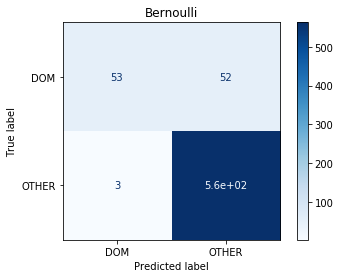

In [199]:
Xtest = Classification(CountVectorizer(),BernoulliNB(),trainX,testX,trainY,testY,"Bernoulli")

En este caso observamos que el metodo de bernoulli con el vectorizador CountVectorizer presenta buenos valores, sobre todo en el caso de la precision ya que es bueno para predecir las oraciones de la clase OTHER.

## TSNE Bernoulli

Es un algoritmo diseñado para la visualización de conjuntos de datos de alta dimensionalidad.

Se ejecuta en dos pasos: en primer lugar construye una distribución de probabilidad sobre parejas de muestras en el espacio original, de forma tal que las muestras semejantes reciben alta probabilidad de ser escogidas, mientras que las muestras muy diferentes reciben baja probabilidad de ser escogidas. El concepto de "semejanza" se basa en la distancia entre puntos y densidad en las proximidades de un punto.

- **n_components (2 por defecto)**: Dimensiones del conjunto transformado.

- **perplexity (30 por defecto)**: Según la documentación de Scikit-Learn, se recomienda un valor entre 5 y 50 (mayor cuanto mayor sea el dataset), aunque se indica que el algoritmo no es muy sensible a este valor.

- **early_exaggeration (12 por defecto)**: Este parámetro controla la distancia entre bloques semejantes en el espacio final. La elección de este valor no es crítico.

- **learning_rate (200 por defecto)**: Habitualmente en el rango (10-1000). Si es muy elevado, los datos transformados estarán formados por una bola de puntos equidistantes unos de otros. Si es muy bajo, los puntos se mostrarán comprimidos en una densa nube con algunos outliers.

- **n_iter (1000 por defecto)**: Número máximo de iteraciones para la optimización. Debería ser, por lo menos, 250.

- **metric**: métrica para la medición de las distancias.

- **method**: algoritmo a usar para el cálculo del gradiente.


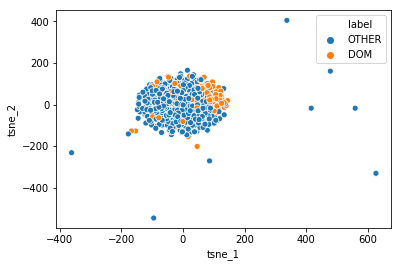

In [200]:
# podemos ver como se encuentran distribuidos los elementos de nuestro set de datos
X_test_embedded = TSNE(n_components=3).fit_transform(Xtest)
plt.figure()
tsne_result_df = pd.DataFrame({'tsne_1': X_test_embedded[:,0], 'tsne_2': X_test_embedded[:,1], 'label': testY})
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df)

# Modelo de Bernoulli TfidfVectorizer

Accuracy: 0.9180327868852459

Precision: 0.9538106547722489

Recall: 0.9180327868852459

F-score: 0.928805637852358


Confusion matrix: 

[[ 53   3]
 [ 52 563]]

Classification report: 

              precision    recall  f1-score   support

         DOM       0.50      0.95      0.66        56
       OTHER       0.99      0.92      0.95       615

    accuracy                           0.92       671
   macro avg       0.75      0.93      0.81       671
weighted avg       0.95      0.92      0.93       671


{'binarize': 0.0, 'alpha': 1.0, 'class_prior': None, 'fit_prior': True}
[[ 53  52]
 [  3 563]]


<671x3504 sparse matrix of type '<class 'numpy.float64'>'
	with 10918 stored elements in Compressed Sparse Row format>

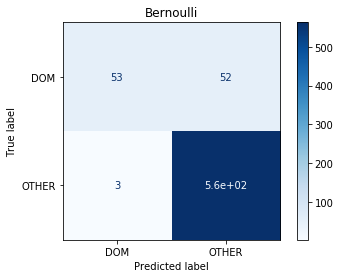

In [201]:
Classification(TfidfVectorizer(),BernoulliNB(),trainX,testX,trainY,testY,"Bernoulli")

En este caso observamos que el metodo de bernoulli con el vectorizador TfidfVectorizer presenta buenos valores identicos a count vectorizer por lo que no tiene sentido seguir verificando al utilizar este vectorizador. Por este motivo seguiremos utilizando Count vectorizer.

# Bernoulli GridSearchCV

Es una clase disponible en scikit-learn que permite evaluar y seleccionar de forma sistemática los parámetros de un modelo. Indicándole un modelo y los parámetros a probar, puede evaluar el rendimiento del primero en función de los segundos mediante validación cruzada. En caso de que se desee evaluar modelos con parámetros aleatorios existe el método RandomizedSearchCV.

**Validación Cruzada**

La validación cruzada es una técnica con la que se puede identificar la existencia de diferentes problemas durante el entrenamiento de los modelos, como la aparición de sobreajuste. Permitiendo así obtener modelos más estables.

- **estimator**: El modelo que se ha de evaluar.

- **param_grid**: Un diccionario en que se indicar los parámetros a evaluar como clave y el conjunto elementos como valor.

- **cv**: el número de conjuntos en los que se divide los datos para la validación cruzada.

In [202]:
from sklearn.model_selection import GridSearchCV
jobs = -1
crossV = 5
alpha=[]
#generamos 100 numeros del 0-1 para utilizar como alphas
for i in range(100):
    alpha.append(i/100) 
parameters = {'alpha' : alpha}
#generamos nuestro clasificador
Bernoulli = BernoulliNB()
#generamos nuestro objeto GridSearchCV con nuestro clasificador, verbouse es el numero de mensajes que imprime
clf_1 = GridSearchCV(Bernoulli, parameters,cv=crossV, n_jobs=jobs, verbose=10)
#entrenamos nuestro modelo
clf_1.fit(Xtrain, trainY)
#predecimos
Ypred=clf_1.predict(Xtest)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 113 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 149 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 189 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 210 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 233 tasks      | elapsed:  

Accuracy: 0.9225037257824144

Precision: 0.9442278395878582

Recall: 0.9225037257824144

F-score: 0.9293262898387687


Confusion matrix: 

[[ 61   8]
 [ 44 558]]

Classification report: 

              precision    recall  f1-score   support

         DOM       0.58      0.88      0.70        69
       OTHER       0.99      0.93      0.96       602

    accuracy                           0.92       671
   macro avg       0.78      0.91      0.83       671
weighted avg       0.94      0.92      0.93       671


	alpha: 0.79

	binarize: 0.0

	class_prior: None

	fit_prior: True

[[ 61  44]
 [  8 558]]


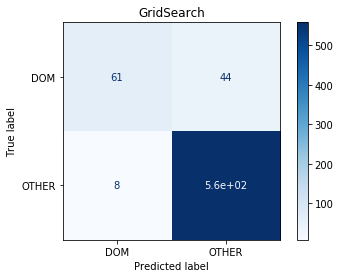

In [203]:
print('Accuracy: {}\n'.format(accuracy_score(Ypred,testY)))
print('Precision: {}\n'.format(precision_score(Ypred,testY, average='weighted')))
print('Recall: {}\n'.format(recall_score(Ypred,testY, average='weighted')))
print('F-score: {}\n'.format(f1_score(Ypred,testY, average='weighted')))
print('\nConfusion matrix: \n')
print(str(confusion_matrix(Ypred,testY)) + '\n')
print('Classification report: \n')
print(classification_report(Ypred,testY) + '\n')
#obtenemos los mejores parametros
best_parameters = clf_1.best_estimator_.get_params()
for params in sorted(best_parameters.keys()):
    print("\t%s: %r\n" % (params, best_parameters[params]))
    
# Matriz de confusion para DOM y Other
print(confusion_matrix(testY, Ypred))
Grid = plot_confusion_matrix(clf_1, Xtest, testY, cmap=plt.cm.Blues, 
                      display_labels=["DOM","OTHER"])
Grid.ax_.set_title("GridSearch")
Grid

En este caso observamos que el metodo de bernoulli con el vectorizador CountVectorizador por medio de la busqueda de hiperparametros con GridSearch, resulto mejor para predecir elementos correspondientes a la clase DOM, sacrificando un poco la capacidad de predecir elementos pertenecientes a la clase OTHER.

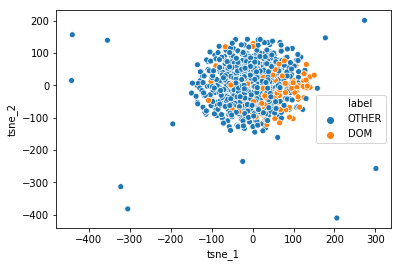

In [204]:
# podemos ver como se encuentran distribuidos los elementos de nuestro set de datos
X_test_embedded = TSNE(n_components=3).fit_transform(Xtest)
plt.figure()
tsne_result_df = pd.DataFrame({'tsne_1': X_test_embedded[:,0], 'tsne_2': X_test_embedded[:,1], 'label': testY})
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df)

# Bernoulli RandomizedSearchCV

Es un método muy útil cuando tenemos muchos parámetros para probar y el tiempo de entrenamiento es muy largo. Para este ejemplo, utilizo un clasificador de bosque aleatorio, así que supongo que ya sabes cómo funciona este tipo de algoritmo.

In [205]:
from sklearn.model_selection import RandomizedSearchCV
import scipy
nIter = 100
#generamos una distribucion exponencial para nuestra alpha
paramGrid = {'alpha': scipy.stats.expon(scale=1.0)}
#generamos nuestro clasificador
Bernoulli = BernoulliNB()
#Generamos nuestro objeto GridSearchCV
clf_2 = RandomizedSearchCV(Bernoulli, paramGrid,n_iter=nIter,cv=crossV, n_jobs=jobs, verbose=10)
#entrenamos el modelo
clf_2.fit(Xtrain, trainY)
#Predecimos
Ypred=clf_2.predict(Xtest)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0328s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 194 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 266 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 346 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 388 ta

Accuracy: 0.9225037257824144

Precision: 0.9442278395878582

Recall: 0.9225037257824144

F-score: 0.9293262898387687


Confusion matrix: 

[[ 61   8]
 [ 44 558]]

Classification report: 

              precision    recall  f1-score   support

         DOM       0.58      0.88      0.70        69
       OTHER       0.99      0.93      0.96       602

    accuracy                           0.92       671
   macro avg       0.78      0.91      0.83       671
weighted avg       0.94      0.92      0.93       671


	alpha: 0.7857244726818572

	binarize: 0.0

	class_prior: None

	fit_prior: True

[[ 61  44]
 [  8 558]]


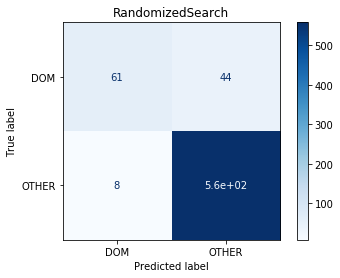

In [206]:
print('Accuracy: {}\n'.format(accuracy_score(Ypred,testY)))
print('Precision: {}\n'.format(precision_score(Ypred,testY, average='weighted')))
print('Recall: {}\n'.format(recall_score(Ypred,testY, average='weighted')))
print('F-score: {}\n'.format(f1_score(Ypred,testY, average='weighted')))
print('\nConfusion matrix: \n')
print(str(confusion_matrix(Ypred,testY)) + '\n')
print('Classification report: \n')
print(classification_report(Ypred,testY) + '\n')
best_parameters = clf_2.best_estimator_.get_params()
for params in sorted(best_parameters.keys()):
    print("\t%s: %r\n" % (params, best_parameters[params]))
    
# Matriz de confusion para DOM y Other
print(confusion_matrix(testY, Ypred))
Rand = plot_confusion_matrix(clf_2, Xtest, testY, cmap=plt.cm.Blues, 
                      display_labels=["DOM","OTHER"])
Rand.ax_.set_title("RandomizedSearch")
Rand

En este caso observamos que el metodo de bernoulli con el vectorizador CountVectorizador por medio de la busqueda de hiperparametros con RandomizedSearch, obtuvo los mismos resultados que los analisis reaslizados por GridSearch por lo que vemos que para este tamaño de datos no hace gran diferencia en usar uno u otro. Igualmente se verifico aumentando el numero de iteraciones pero los resultados no fueron diferentes.

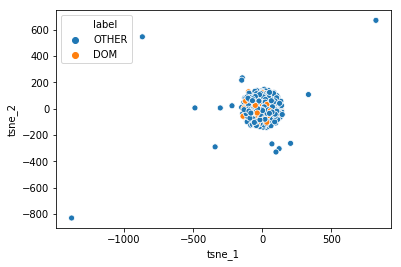

In [207]:
# podemos ver como se encuentran distribuidos los elementos de nuestro set de datos
X_test_embedded = TSNE(n_components=3).fit_transform(Xtest)
plt.figure()
tsne_result_df = pd.DataFrame({'tsne_1': X_test_embedded[:,0], 'tsne_2': X_test_embedded[:,1], 'label': testY})
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df)

# SVM

Son un conjunto de métodos de aprendizaje supervisado que se utilizan para la clasificación, regresión y detección de valores atípicos.

Las ventajas de las máquinas de vectores de soporte son:

- Eficaz en espacios de gran dimensión.

- Sigue siendo eficaz en los casos en que el número de dimensiones es mayor que el número de muestras.

- Utiliza un subconjunto de puntos de entrenamiento en la función de decisión (llamados vectores de soporte), por lo que también es eficiente en la memoria.

- Versátil: se pueden especificar diferentes funciones del núcleo para la función de decisión. Se proporcionan núcleos comunes, pero también es posible especificar núcleos personalizados.

Las desventajas de las máquinas de vectores de soporte incluyen:

- Si el número de características es mucho mayor que el número de muestras, evite el ajuste excesivo al elegir las funciones del Kernel y el término de regularización es crucial.

- Las SVM no proporcionan directamente estimaciones de probabilidad, estas se calculan mediante una costosa validación cruzada de cinco veces (consulte Puntuaciones y probabilidades, a continuación).

In [208]:
from sklearn.svm import SVC

# Definición del clasificador
svm_classifier = SVC(kernel = "linear", probability = True)

# Entrenamiento del clasificador con lo datos de entrenamiento y valores de clase para cada ejemplo
svm_classifier.fit(Xtrain, trainY)

# Predicción con el clasificador entrenado en los datos de evaluación 
Ypred = svm_classifier.predict(Xtest)

In [209]:
print('Accuracy: {}\n'.format(accuracy_score(Ypred,testY)))
print('Precision: {}\n'.format(precision_score(Ypred,testY, average='weighted')))
print('Recall: {}\n'.format(recall_score(Ypred,testY, average='weighted')))
print('F-score: {}\n'.format(f1_score(Ypred,testY, average='weighted')))
print('\nConfusion matrix: \n')
print(str(confusion_matrix(Ypred,testY)) + '\n')
print('Classification report: \n')
print(classification_report(Ypred,testY) + '\n')
best_parameters = clf_2.best_estimator_.get_params()
for params in sorted(best_parameters.keys()):
    print("\t%s: %r\n" % (params, best_parameters[params]))

Accuracy: 0.9180327868852459

Precision: 0.9215754586605539

Recall: 0.9180327868852459

F-score: 0.9195446025286563


Confusion matrix: 

[[ 73  23]
 [ 32 543]]

Classification report: 

              precision    recall  f1-score   support

         DOM       0.70      0.76      0.73        96
       OTHER       0.96      0.94      0.95       575

    accuracy                           0.92       671
   macro avg       0.83      0.85      0.84       671
weighted avg       0.92      0.92      0.92       671


	alpha: 0.7857244726818572

	binarize: 0.0

	class_prior: None

	fit_prior: True



In [210]:
from sklearn.manifold import TSNE

print("Dimensiones originales\t{}".format(Xtest.shape))

# Reducción de dimensiones
X_test_embedded = TSNE(n_components=2).fit_transform(Xtest)
print("Dimensiones reducidas\t{}".format(X_test_embedded.shape))

Dimensiones originales	(671, 3504)
Dimensiones reducidas	(671, 2)


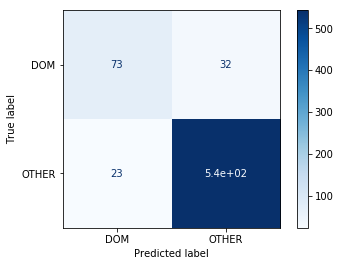

In [211]:
# Matriz de confusión de la predicción de datos (SVM)
plot_confusion_matrix(svm_classifier, Xtest, testY, cmap=plt.cm.Blues, 
                      display_labels=["DOM","OTHER"])

En este modelo observamos que se vuelve mas efectivo para predecir las oraciones pertenecientes a la clase DOM, mientras que por el lado de la efectividad prediciendo oraciones de la clase OTHER disminuyo considerablemente.

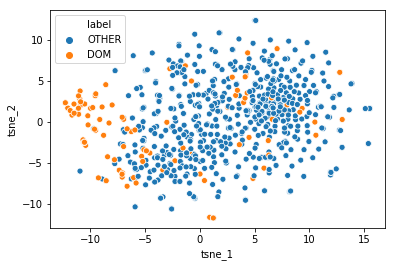

In [212]:
# Scatterplot para las clases
plt.figure()
tsne_result_df = pd.DataFrame({'tsne_1': X_test_embedded[:,0], 'tsne_2': X_test_embedded[:,1], 'label': testY})
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df)

# Lematización

La lematización es un proceso lingüístico que consiste en, dada una forma flexionada (es decir, en plural, en femenino, conjugada, etc), hallar el lema correspondiente. El lema es la forma que por convenio se acepta como representante de todas las formas flexionadas de una misma palabra.

## Generación de archivo con CoreNLP

In [213]:
#%%bash
# Tepeu
#java -Xmx2g edu.stanford.nlp.pipeline.StanfordCoreNLP -annotators tokenize,ssplit,pos,lemma -outputFormat conll -tokenize.whitespace true -ssplit.eolonly true -ssplit.boundaryFollowersRegex {"? subunit"} -file testData.txt -outputDirectory .

In [214]:
%%bash
head trainData.txt.conll

1	PgrR	pgrr	NN	_	_	_
2	,	,	,	_	_	_
3	Peptide	peptide	NN	_	_	_
4	glycan	glycan	NN	_	_	_
5	recycling	recycle	VBG	_	_	_
6	Regulator	Regulator	NNP	_	_	_
7	.	.	.	_	_	_

1	The	the	DT	_	_	_
2	transcriptional	transcriptional	JJ	_	_	_


## Longitud de los set de datos

Como CoreNLP regresa un archivo de oraciones en bloques, las dimensiones del archivo son muy diferentes a las de las oraciones. Por este motivo tenemos que transformar los archivos de CoreNLP en oraciones.

In [215]:
def LemmaData(LemmaPath,OriginalPath,ClassesPath):
    
    # Archivos para mapear las oraciones lematizadas
    LemmaFile = open(LemmaPath,"r")
    OriginalFile = open(OriginalPath,"r")
    ClassesFile = open(ClassesPath,"r")
    
    # Listas que contendran las oraciones y las clases
    LemmaSentences = []
    LemmaAssociate = []
    OriginalSentence = []
    CaptureSentences = []
    ClassesData = []
    SentenceClasses = []
    FinalLemma = []
    FinalClasses = []
    
    # Variables de captura de oraciones
    SentenceLemma = ""
    SentenceCapture = ""
    
    
    # lista que contendra las oraciones y cadena donde se formara la oración
    for line in LemmaFile:
        # Si la linea del archivo es un salto significa que termino el bloque
        if line == "\n":
            continue
        # Separamos columnas por tabuladores
        line = line.split("\t")
        # Si no es un punto continuamos la oración
        if line[2] != ".":
            SentenceLemma = SentenceLemma + line[2] + " "
            SentenceCapture = SentenceCapture + line[1] + " "
            continue
        # Si es un punto sabemos que la oración termino
        if line[2] == ".":
            # Colocar punto final de la oracion
            SentenceLemma = SentenceLemma + "."
            SentenceCapture = SentenceCapture + "."
            # Agregar oraciones a sus respectivas listas
            LemmaSentences.append(SentenceLemma)
            CaptureSentences.append(SentenceCapture)
            # Generar lista de tuplas que asocia las oraciones
            Values = (SentenceCapture,SentenceLemma)
            LemmaAssociate.append(Values)
            SentenceLemma = ""
            SentenceCapture = ""
            continue
            
    # Obtener las oraciones del archivo de entrada        
    for line in OriginalFile:
        line = line.replace("\n","")
        OriginalSentence.append(line)
      
    # Obtener el archivo de las clases
    for line in ClassesFile:
        line = line.replace("\n","")
        ClassesData.append(line)
    
    # Generar lista de asociación entre oracion y clase
    Count = 0
    for element in OriginalSentence:
        Relation = (element,ClassesData[Count])
        SentenceClasses.append(Relation)
        Count = Count + 1
    
    # Regresar lista de lematizados y lista de sus respectivas clases
    for element in LemmaAssociate:
        for values in SentenceClasses:
            if element[0] == values[0]:
                FinalLemma.append(element[1])
                FinalClasses.append(values[1])
                break
                
    # Archivos para mapear las oraciones lematizadas
    LemmaFile.close()
    OriginalFile.close()
    ClassesFile.close()  
        
    return FinalLemma,FinalClasses    

In [216]:
LemmaX,LemmaDataY = LemmaData("trainData.txt.conll","trainData.txt","trainClasses.txt")
testX,testY = LemmaData("testData.txt.conll","testData.txt","testClasses.txt")

In [217]:
print(len(testX))
print(len(testY))

668
668


In [218]:
# Ya que tenemos las oraciones lematizados
trainX = LemmaX
trainY = LemmaDataY

#como ya no son las mismas oraciones volvemos a entrenar al vectorizador
vectorizer = CountVectorizer()
XLemma = vectorizer.fit_transform(trainX)
Xtest=vectorizer.transform(testX)

In [219]:
paramGrid = {'alpha': scipy.stats.expon(scale=1.0)}
Bernoulli = BernoulliNB()
clf_3 = RandomizedSearchCV(Bernoulli, paramGrid,n_iter=nIter,cv=crossV, n_jobs=jobs, verbose=10)
clf_3.fit(XLemma, trainY)
Ypred=clf_3.predict(Xtest)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0292s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 102 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 162 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 230 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 306 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 348 ta

Accuracy: 0.9221556886227545

Precision: 0.942387932808687

Recall: 0.9221556886227545

F-score: 0.9286223090645822


Confusion matrix: 

[[ 61   9]
 [ 43 555]]

Classification report: 

              precision    recall  f1-score   support

         DOM       0.59      0.87      0.70        70
       OTHER       0.98      0.93      0.96       598

    accuracy                           0.92       668
   macro avg       0.79      0.90      0.83       668
weighted avg       0.94      0.92      0.93       668


	alpha: 0.7955122018411183

	binarize: 0.0

	class_prior: None

	fit_prior: True

[[ 61  43]
 [  9 555]]


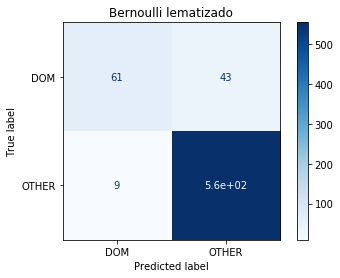

In [220]:
print('Accuracy: {}\n'.format(accuracy_score(Ypred,testY)))
print('Precision: {}\n'.format(precision_score(Ypred,testY, average='weighted')))
print('Recall: {}\n'.format(recall_score(Ypred,testY, average='weighted')))
print('F-score: {}\n'.format(f1_score(Ypred,testY, average='weighted')))
print('\nConfusion matrix: \n')
print(str(confusion_matrix(Ypred,testY)) + '\n')
print('Classification report: \n')
print(classification_report(Ypred,testY) + '\n')
best_parameters = clf_3.best_estimator_.get_params()
for params in sorted(best_parameters.keys()):
    print("\t%s: %r\n" % (params, best_parameters[params]))
# Matriz de confusion para DOM y Other
print(confusion_matrix(testY, Ypred))
BernL = plot_confusion_matrix(clf_3, Xtest, testY, cmap=plt.cm.Blues, 
                      display_labels=["DOM","OTHER"])
BernL.ax_.set_title("Bernoulli lematizado")
BernL

Una vez que hicimos la lematización ejecutamos el modelo de bernoulli, de modo que observamos un modelo mas intermedio en donde se alcanzan a apreciar buenas predicciones para la clase DOM y buena prediccion para la clase OTHER. Por lo que el modelo Bernoulli Lematizado es una buena opcion para clasificar estas oraciones en una clase correcta

Por medio de TSNE visualizaremos los datos de alta dimensión, en este caso lo reduciremos a un mapa tridimensional.

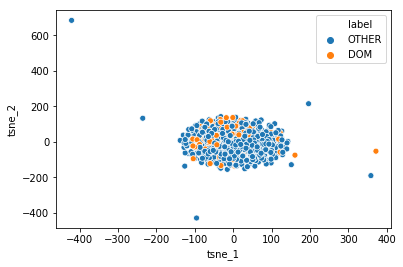

In [221]:
# podemos ver como se encuentran distribuidos los elementos de nuestro set de datos
X_test_embedded = TSNE(n_components=3).fit_transform(Xtest)
plt.figure()
tsne_result_df = pd.DataFrame({'tsne_1': X_test_embedded[:,0], 'tsne_2': X_test_embedded[:,1], 'label': testY})
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df)

# MultinomialNB

Es un clasificador adecuado para la clasificación con características discretas (por ejemplo, recuento de palabras para la clasificación de texto). La distribución multinomial normalmente requiere recuentos de características enteras. Sin embargo, en la práctica, los recuentos fraccionarios como tf-idf también pueden funcionar.

In [222]:
from sklearn.naive_bayes import MultinomialNB
paramGrid = {'alpha': scipy.stats.expon(scale=1.0)}
Multinomial = MultinomialNB()
clf_multi = RandomizedSearchCV(Multinomial, paramGrid,n_iter=nIter,cv=crossV, n_jobs=jobs, verbose=10)
clf_multi.fit(XLemma, trainY)
Ypred=clf_multi.predict(Xtest)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1614s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 102 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 162 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 230 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 306 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 348 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 390 ta

Accuracy: 0.9311377245508982

Precision: 0.9317118626903313

Recall: 0.9311377245508982

F-score: 0.9314110673746586


Confusion matrix: 

[[ 80  22]
 [ 24 542]]

Classification report: 

              precision    recall  f1-score   support

         DOM       0.77      0.78      0.78       102
       OTHER       0.96      0.96      0.96       566

    accuracy                           0.93       668
   macro avg       0.87      0.87      0.87       668
weighted avg       0.93      0.93      0.93       668


	alpha: 1.3697377027767006

	class_prior: None

	fit_prior: True

[[ 80  24]
 [ 22 542]]


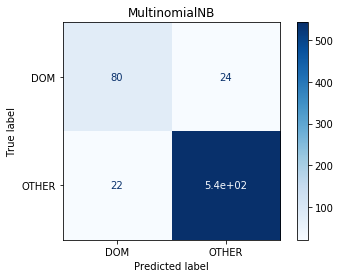

In [223]:
print('Accuracy: {}\n'.format(accuracy_score(Ypred,testY)))
print('Precision: {}\n'.format(precision_score(Ypred,testY, average='weighted')))
print('Recall: {}\n'.format(recall_score(Ypred,testY, average='weighted')))
print('F-score: {}\n'.format(f1_score(Ypred,testY, average='weighted')))
print('\nConfusion matrix: \n')
print(str(confusion_matrix(Ypred,testY)) + '\n')
print('Classification report: \n')
print(classification_report(Ypred,testY) + '\n')
best_parameters = clf_multi.best_estimator_.get_params()
for params in sorted(best_parameters.keys()):
    print("\t%s: %r\n" % (params, best_parameters[params]))
# Matriz de confusion para DOM y Other
print(confusion_matrix(testY, Ypred))
Multi = plot_confusion_matrix(clf_multi, Xtest, testY, cmap=plt.cm.Blues, 
                      display_labels=["DOM","OTHER"])
Multi.ax_.set_title("MultinomialNB")
Multi

Por parte del multinomial encontramos que tambien se obtuvieron buenos resultados en la predicción de las clases a las que pertenecen las oraciones, sin embargo, este modelo se inclina mas en predecir las oraciones que pertenecen a la clase DOM. 

Por medio de TSNE visualizaremos los datos de alta dimensión, en este caso lo reduciremos a un mapa tridimensional.

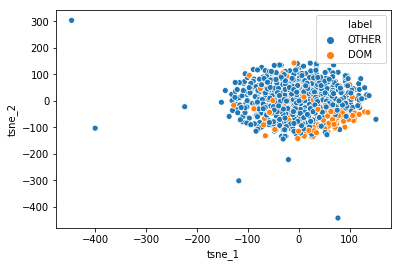

In [224]:
# podemos ver como se encuentran distribuidos los elementos de nuestro set de datos
X_test_embedded = TSNE(n_components=3).fit_transform(Xtest)
plt.figure()
tsne_result_df = pd.DataFrame({'tsne_1': X_test_embedded[:,0], 'tsne_2': X_test_embedded[:,1], 'label': testY})
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df)